In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1087 - mae: 0.9367  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5947 - mae: 0.6178 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2670 - mae: 0.4060 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2665 - mae: 0.4234 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2849 - mae: 0.4326 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3105 - mae: 0.4543 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2991 - mae: 0.4566 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2408 - mae: 0.3919 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2378 - mae: 0.3964 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2578 - mae: 0.3987 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2737 - mae: 0.4215 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2627 - mae: 0.4066 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

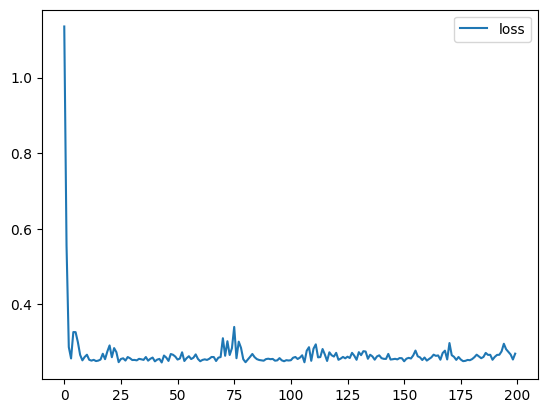

In [14]:
N = 100
X = np.random.rand(N) * 6-3
Y = 0.5 * X -1 + np.random.randn(N) * 0.5 # X +noise
plt.scatter(X, Y)

# build model
i = Input(shape=(1,))
x = Dense(1)(i)
model = Model(i, x)


model.compile(
    optimizer=Adam(learning_rate=0.1), 
    loss='mse',
    metrics = ['mae'])

model.summary()

r = model.fit(X.reshape(-1, 1), 
              Y, 
              epochs=200,
              batch_size=32)

# plot Loss
plt.plot(r.history['loss'],label='loss')
plt.legend()

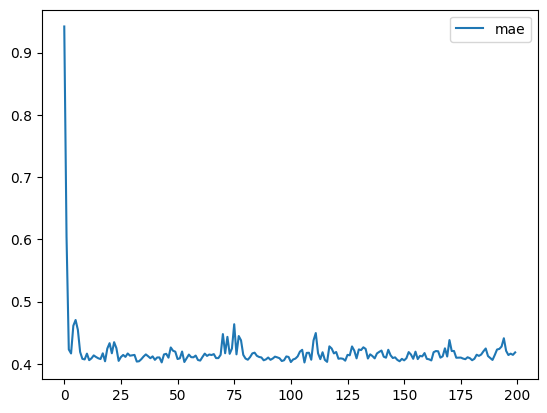

In [15]:
# PLot mae per iteration
plt.plot(r.history['mae'],label='mae')
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


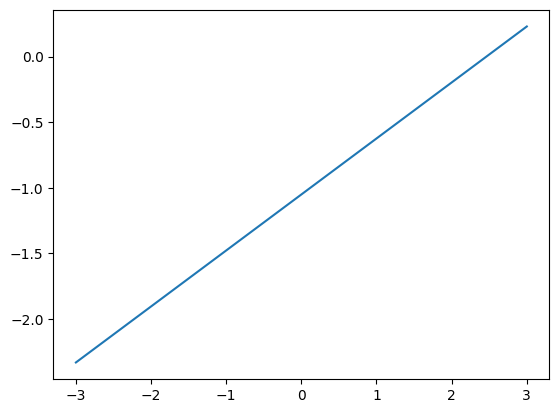

In [16]:
XTest = np.linspace(-3, 3, 100).reshape(-1, 1)
ptest = model.predict(XTest)
plt.plot(XTest, ptest, label='prediction')

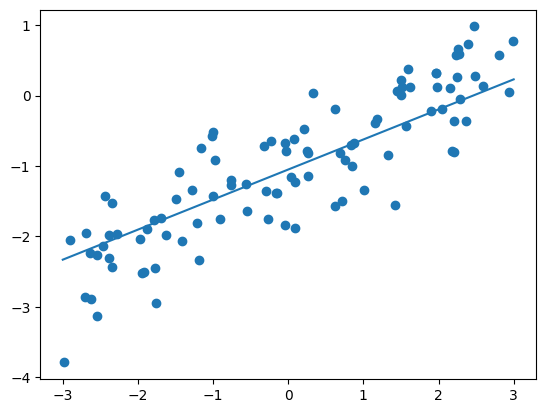

In [17]:
plt.scatter(X, Y, label='data')
plt.plot(XTest, ptest, label='prediction')

In [18]:
model.layers[1].get_weights()

[array([[0.4266403]], dtype=float32), array([-1.0505999], dtype=float32)]